In [19]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

csvPath = "D:\\ARTIFICIAL INTELLIGENCE\\2020\\KLASIFIKASI\\bantul_2019_Rachmawan_onlyPart.csv"

data = pd.read_csv(csvPath)

data['label'] = data['label'].fillna(value=0.0)
print (data.shape)

data = data.dropna(axis=0, subset=['namaoutput', 'namaoutcome', 'namaprogram', 'namakegiatan', 'satuanoutput', 'satuanoutcome'])
print (data.shape)

(195, 33)
(170, 33)


In [20]:
class MyLabelEncoder():

    def transform(self, X, y=None, **fit_params):
        enc = preprocessing.LabelEncoder()
        encc = enc.fit(X)
        enc_data = enc.transform(X).reshape(-1, 1)

        return enc_data

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X).reshape(-1, 1)

    def fit(self, X, y=None, **fit_params):
        return self

In [21]:
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

def get_text_satuan_outcome(df):
    return df['satuanoutcome']

def get_text_satuan_output(df):
    return df['satuanoutput']

def get_text_nama_program(df):
    return df['namaprogram']

def get_text_nama_kegiatan(df):
    return df['namakegiatan']

def get_text_nama_output(df):
    return df['namaoutput']

def get_text_nama_outcome(df):
    return df['namaoutcome']

In [22]:
joblib_model = joblib.load('neo_pipeline.pkl')

In [23]:
data_column_used = data[['namaprogram', 'satuanoutcome', 'satuanoutput', 'namakegiatan', 'namaoutput', 'namaoutcome']]

In [24]:
data_target = data['label'].astype(int)

In [25]:
labels_pred = joblib_model.predict(data_column_used)

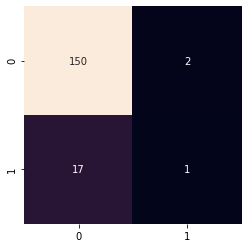

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt
mat = confusion_matrix(labels_pred, data_target)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['0', '1'], yticklabels=['0', '1'])

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_pred, data_target)

0.888235294117647

In [28]:
from sklearn.metrics import classification_report

print (classification_report(labels_pred, data_target, target_names=['non-doc', 'doc']))

              precision    recall  f1-score   support

     non-doc       0.99      0.90      0.94       167
         doc       0.06      0.33      0.10         3

    accuracy                           0.89       170
   macro avg       0.52      0.62      0.52       170
weighted avg       0.97      0.89      0.93       170

